- Fonte: [https://projecteuler.net/problem=50](https://projecteuler.net/problem=50)

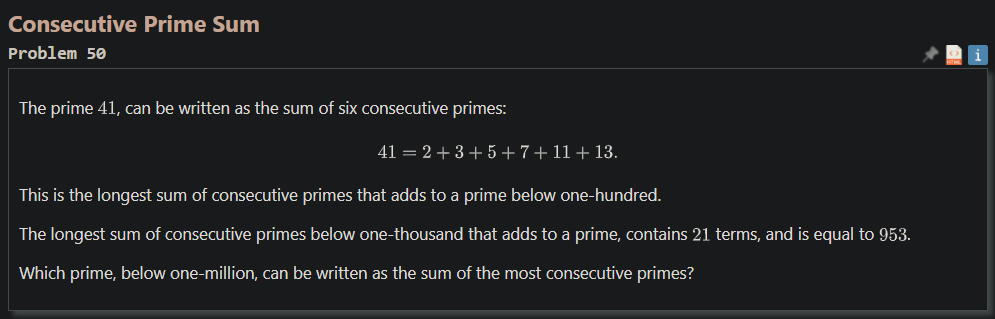

In [1]:
from math import sqrt
from tqdm import tqdm
import numpy as np

In [3]:
def e_primo(n: int)->bool:
    """Define se o número n é primo"""
    c = 0
    d = 2
    while d < int(sqrt(n))+1:
        c += 1 if n % d == 0 else 0
        d += 1
        if (c >= 2):
            break
    
    return c == 0

print (e_primo(2))
print (e_primo(3))
print (e_primo(13))
print (e_primo(25))


True
True
True
False


In [4]:
primos = [2]
for n in tqdm(range(3, 1_000_000, 2), ncols=100):
    if e_primo(n):
        primos.append(n)

print (primos[:15])

100%|████████████████████████████████████████████████████| 499999/499999 [00:46<00:00, 10721.01it/s]

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]


In [5]:
# O último primo antes de mil é
primos[-1]

999983

In [9]:
soma = 0
i = 0
possibilidades = []
while soma + primos[i+1] < 1_000_000:
    soma += primos[i]
    possibilidades.append(primos[i])
    i += 1

print (f'{np.array(primos)=}')
print (f'{len(primos)}')
print (f'{soma=}')
print (f'{e_primo(soma)=}')

np.array(primos)=array([     2,      3,      5, ..., 999961, 999979, 999983])
78498
soma=997661
e_primo(soma)=False


- Enquanto a soma das possibilidades não for um número primo, vamos retirando os números das possibilidades.
- Podemos retirar o último número ou o primeiro número, até que a soma seja um número primo.

In [10]:
def encontrar_maior_numero_de_termos_ate_(N_MAX: int)->list:
    """
    Função se divide em duas partes. Primeira que pega todos os números possíveis primos cuja soma não exceda N_MAX.  
    Pegamos do primeiro termo pois como queremos a maior sequência possível, então é melhor pegar pelos menores, pois dá mais quantidade de números na soma.
    
    A segunda parte da função é verificar se a soma dessa lista de possibilidades dá um número primo. 
    Enquanto não for número primo, vamos tentando retirar seja o primeiro termo ou o último termo até encontrar uma soma dessas possiblidades reduzidas que dê um número primo . 
    """

    # Primeira parte da função
    soma = 0
    i = 0
    possibilidades = []
    while soma + primos[i+1] < N_MAX:
        soma += primos[i]
        possibilidades.append(primos[i])
        i += 1
    
    # Segunda parte da função

    primeiros, ultimos = 1, 1
    encontrou_numero_primo = False

    resultado = []

    while not(encontrou_numero_primo):
        possibilidades_1 = possibilidades[primeiros:] # remove os n primeiros termos das possibilidades
        possibilidades_2 = possibilidades[:-ultimos] # remove os n últimos termos das possibilidades

        if (e_primo(sum(possibilidades_1))):
            encontrou_numero_primo = True
            resultado = possibilidades_1
        elif (e_primo(sum(possibilidades_2))):
            encontrou_numero_primo = True
            resultado = possibilidades_2
        else:
            pass

        primeiros += 1
        ultimos += 1
    
    return resultado

In [11]:
resultado = encontrar_maior_numero_de_termos_ate_(100)

print (f'{resultado=}')
print (f'{len(resultado)=}')
print (f'{sum(resultado)=}')
print (f'{e_primo(sum(resultado))=}')

resultado=[2, 3, 5, 7, 11, 13]
len(resultado)=6
sum(resultado)=41
e_primo(sum(resultado))=True


In [13]:
resultado = encontrar_maior_numero_de_termos_ate_(1_000)

print (f'{resultado=}')
print (f'{len(resultado)=}')
print (f'{sum(resultado)=}')
print (f'{e_primo(sum(resultado))=}')

resultado=[7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89]
len(resultado)=21
sum(resultado)=953
e_primo(sum(resultado))=True


In [14]:
resultado = encontrar_maior_numero_de_termos_ate_(1_000_000)

print (f'{resultado=}')
print (f'{len(resultado)=}')
print (f'{sum(resultado)=}')
print (f'{e_primo(sum(resultado))=}')

resultado=[7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 1